In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prettytable import prettytable
import re
import pickle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
project=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/train_data.csv")
resource=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/resources.csv")

In [10]:
project.shape

(109248, 17)

In [11]:
project.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved'], dtype=object)

In [12]:
project.sample(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
106599,90077,p187326,cf0aa6240371cedbdae130f69ab6d4eb,Ms.,TN,2017-03-15 15:33:36,Grades PreK-2,Literacy & Language,"ESL, Literacy",Literacy Learning Station Supplies,I am a first grade teacher to 23 amazing and e...,My students favorite time of the day is our 90...,NaN,NaN,My students need various types of supplies for...,0,1
60131,137766,p247986,a6341d6db3a34dfdc3a2d78850286576,Mrs.,TX,2017-03-02 14:11:50,Grades 3-5,Math & Science,Environmental Science,Solar Fun with Balloons and SunArt,I have approximately 130 Gifted and Talented S...,Students will be able to use SunArt paper to ...,NaN,NaN,My students need solar balloons and solar prin...,2,1


**Data Analysis**

In [13]:
num=project.project_is_approved.value_counts().values
a=round(num[0]/project.project_is_approved.value_counts().sum()*100)
b=round(num[1]/project.project_is_approved.value_counts().sum()*100)

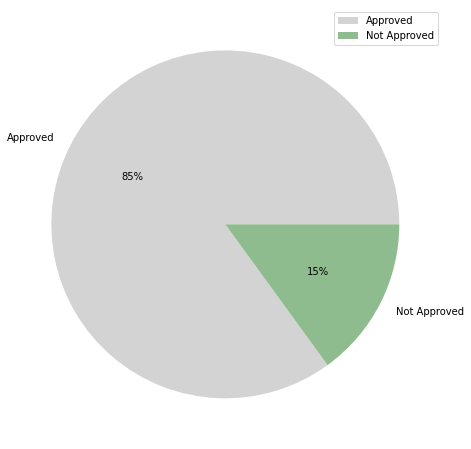

92706 projects out of 109248 are Approved
16542 projects out of 109248 are Not Approved


In [14]:
#https://www.statology.org/seaborn-pie-chart/
data = [a,b]
labels = ["Approved","Not Approved"]
colors=['#D3D3D3','#8FBC8F']
#create pie chart
plt.figure(figsize=(8,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()
#-----------------------------------------------------------------------
number=project.project_is_approved.value_counts().values
for l,n in zip(labels,number):
  print('{0} projects out of {2} are {1}'.format(n,l,project.project_is_approved.value_counts().sum()))
  

#**Univariate Analysis**

In [15]:
def bar(val,r='0'):
  x=project[val][project.project_is_approved==1].value_counts().index
  y=project[val][project.project_is_approved==1].value_counts().values
  plt.figure(figsize=(8,5))
  sns.set_theme()
  sns.barplot(x,y)
  plt.title("Approved Projects by "+val)
  plt.xlabel(val)
  plt.ylabel("Projects Appoved")
  plt.xticks(rotation=r)
  #------------------------------------------------------
  plt.show()
#----------------------------------------------------------------------------------------------

In [16]:
def get_frame(val):
  state=project[val][project.project_is_approved==1].value_counts().index.tolist()
  pro=project[val][project.project_is_approved==1].value_counts().values.tolist()
  project_approved_per_state={S:P for S,P in zip(state,pro)}
  print(project_approved_per_state)
  #--------------------------------------------------------------------------------
  # Average project approved by state
  S=project.groupby(by=project[val])
  average=S.project_is_approved.mean()*100
  name=average.index.tolist()
  average=np.round(average.values).tolist()
  #count of projects
  total=S.project_is_approved.count().tolist()
  #-------------------------------------------------------------------------------
  col=[]
  Approved_Projects=[]
  Total_Projects=[]
  Average_projects_approved=[]
  for S,P in project_approved_per_state.items():
    col.append(S)
    idx=name.index(S)
    Average_projects_approved.append(average[idx])
    Total_Projects.append(total[idx])
    Approved_Projects.append(P)
  df=pd.DataFrame(data={val:col,'Approved_Projects':Approved_Projects,'Total_Projects':Total_Projects,'Average_projects_approved':Average_projects_approved})
  df.sort_values('Total_Projects',ascending=False,inplace=True)
  del state,pro,project_approved_per_state,S,average,name,total,col,Approved_Projects,Total_Projects,Average_projects_approved
  return df


In [17]:
def stack_bar(val,df):
  idx = np.arange(df.shape[0])
  plt.figure(figsize=(15,8))
  plt.title('projects approved '+val)
  plt.ylabel('Total number of Projects')
  plt.xlabel(val)
  B1 = plt.bar(idx, df.Total_Projects.values,color='skyblue')
  B2= plt.bar(idx, df.Approved_Projects.values,color='lightgreen')
  plt.xticks(idx,df[val].values)
  plt.legend((B1[0], B2[0]), ('total Apllied Projects', 'accepted projects'))
  plt.show()

In [18]:
project.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved'], dtype=object)

In [19]:
col=['teacher_prefix', 'school_state','project_grade_category','project_subject_categories', 'project_subject_subcategories']

#teacher_prefix

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


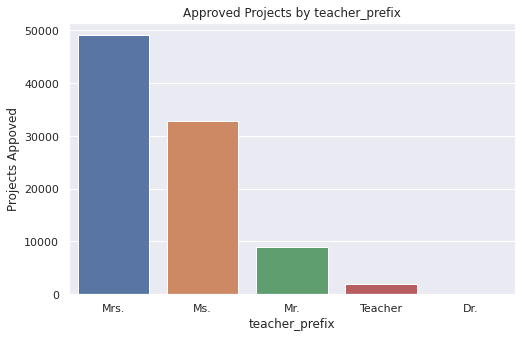

{'Mrs.': 48997, 'Ms.': 32860, 'Mr.': 8960, 'Teacher': 1877, 'Dr.': 9}


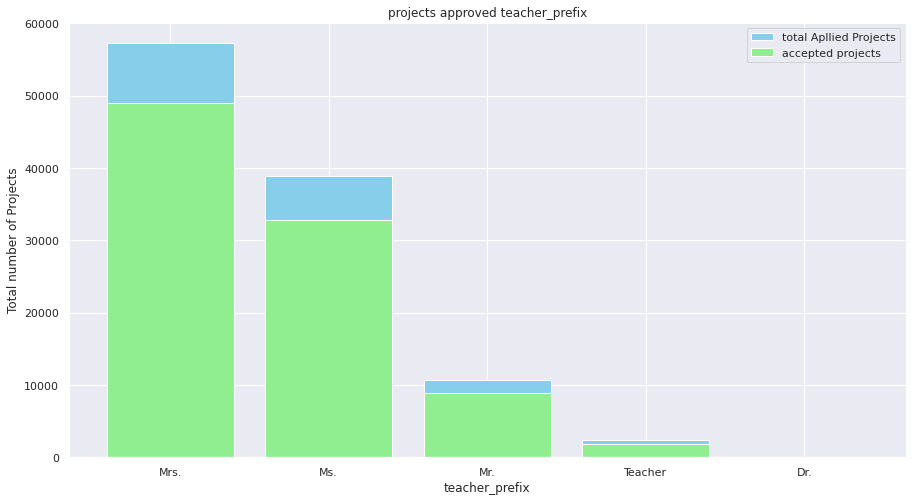

In [20]:
bar('teacher_prefix')
frame=get_frame('teacher_prefix')
stack_bar('teacher_prefix',frame)

#'school_state'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


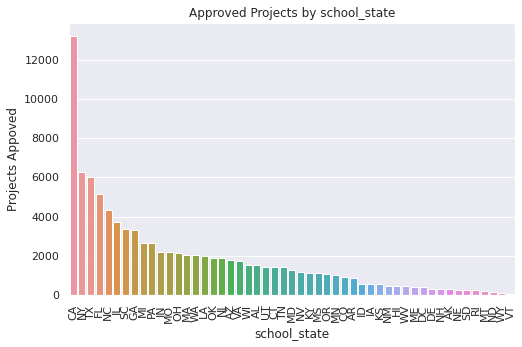

{'CA': 13205, 'NY': 6291, 'TX': 6014, 'FL': 5144, 'NC': 4353, 'IL': 3710, 'SC': 3385, 'GA': 3329, 'MI': 2672, 'PA': 2658, 'IN': 2214, 'MO': 2202, 'OH': 2159, 'MA': 2055, 'WA': 2045, 'LA': 1990, 'OK': 1900, 'NJ': 1888, 'AZ': 1800, 'VA': 1739, 'WI': 1545, 'AL': 1506, 'UT': 1448, 'CT': 1445, 'TN': 1435, 'MD': 1270, 'NV': 1167, 'KY': 1126, 'MS': 1118, 'OR': 1056, 'MN': 1036, 'CO': 935, 'AR': 872, 'ID': 579, 'IA': 568, 'KS': 532, 'NM': 479, 'HI': 434, 'WV': 430, 'ME': 428, 'DC': 414, 'DE': 308, 'NH': 304, 'AK': 290, 'NE': 260, 'SD': 252, 'RI': 243, 'MT': 200, 'ND': 127, 'WY': 82, 'VT': 64}


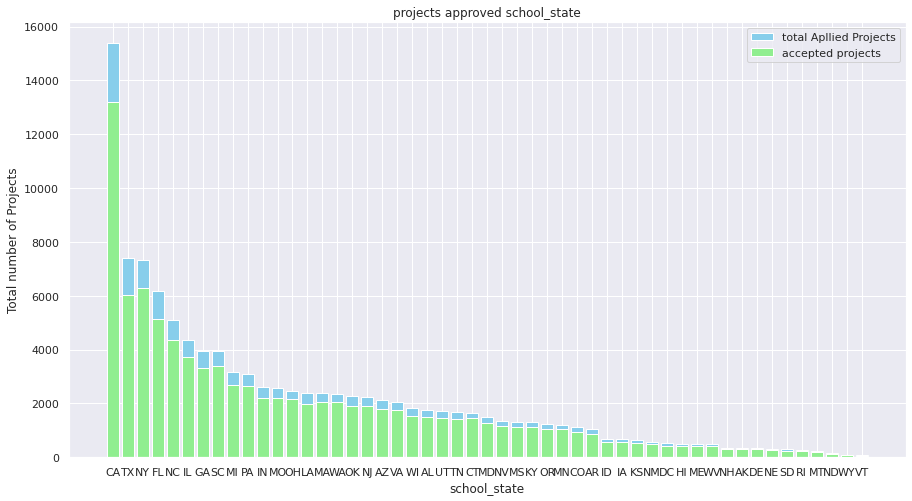

In [21]:
bar('school_state','90')
frame=get_frame('school_state')
stack_bar('school_state',frame)

#'project_grade_category'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


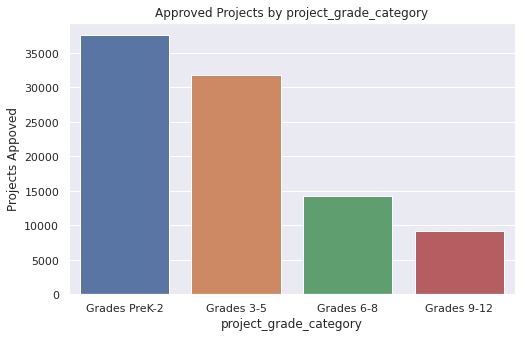

{'Grades PreK-2': 37536, 'Grades 3-5': 31729, 'Grades 6-8': 14258, 'Grades 9-12': 9183}


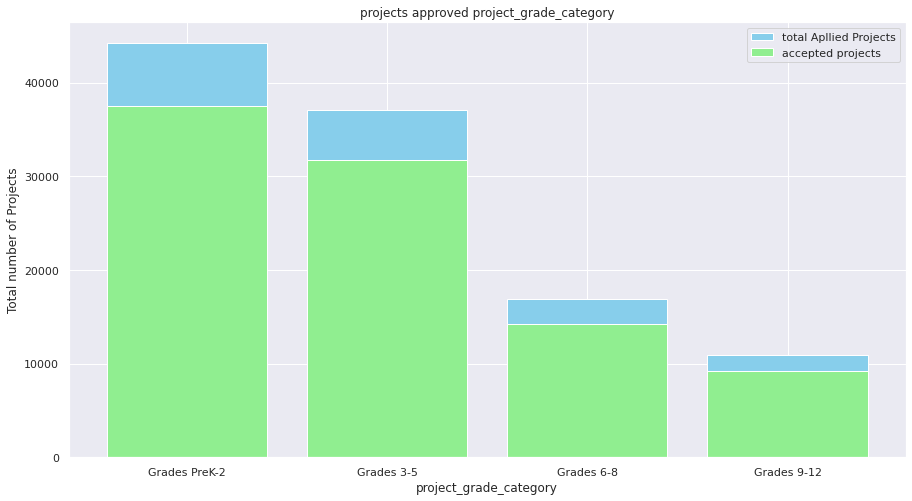

In [22]:
bar('project_grade_category')
frame=get_frame('project_grade_category')
stack_bar('project_grade_category',frame)

#project_subject_categories

In [23]:
from collections import Counter

In [24]:
def fun(value):
  categ=np.unique(value.values)
  categories=set()
  for cat in categ:
    lst=cat.split(",")
    for w in lst:
      categories.add(w.strip())
    del lst
  categories=list(categories)
  #print(categories)
  #---------------------------------------------------------------
  my_counter = Counter(value.values)
  count=[]
  for c in categories:
    temp=[]
    for k,v in my_counter.items():
      if c in k:
        temp.append(v)
      else:
        continue
    count.append(sum(temp))
    del temp 
  #------------------------------------------------------------------
  x=[]
  y=[]
  for c,cat in sorted(zip(count,categories)):
    x.append(cat)
    y.append(c)
  del count,categories,categ
  return x,y

In [25]:
def plot(names,val_all,val,s,r='0'):
  idx = np.arange(len(names))
  plt.figure(figsize=(16,10))
  plt.title('projects approved based on '+s)
  plt.ylabel('Total number of Projects')
  plt.xlabel(s)
  B1 = plt.bar(idx, val_all,color='purple')
  B2= plt.bar(idx, val,color='pink')
  plt.xticks(idx,names,rotation=r)
  plt.legend((B1[0], B2[0]), ('total Apllied Projects', 'accepted projects'))
  plt.show()

In [26]:
names,val_all=fun(project['project_subject_categories'])

In [27]:
_,val=fun(project['project_subject_categories'][project.project_is_approved==1])

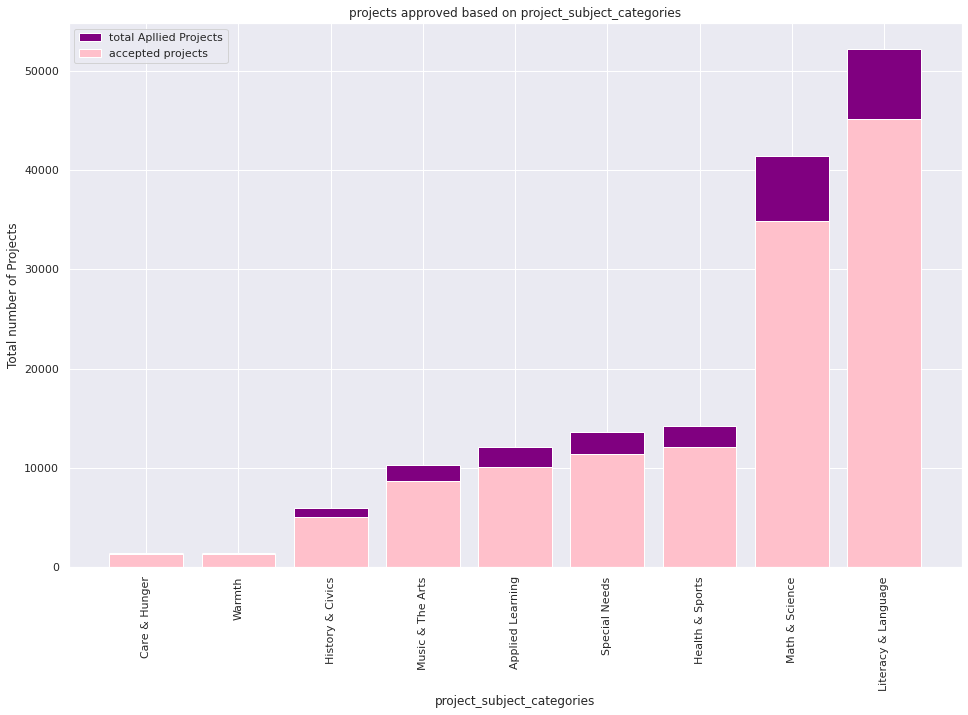

In [28]:
plot(names,val_all,val,"project_subject_categories","90")

#project_subject_subcategories

In [29]:
names,val_all=fun(project["project_subject_subcategories"])

In [30]:
_,val=fun(project["project_subject_subcategories"][project.project_is_approved==1])

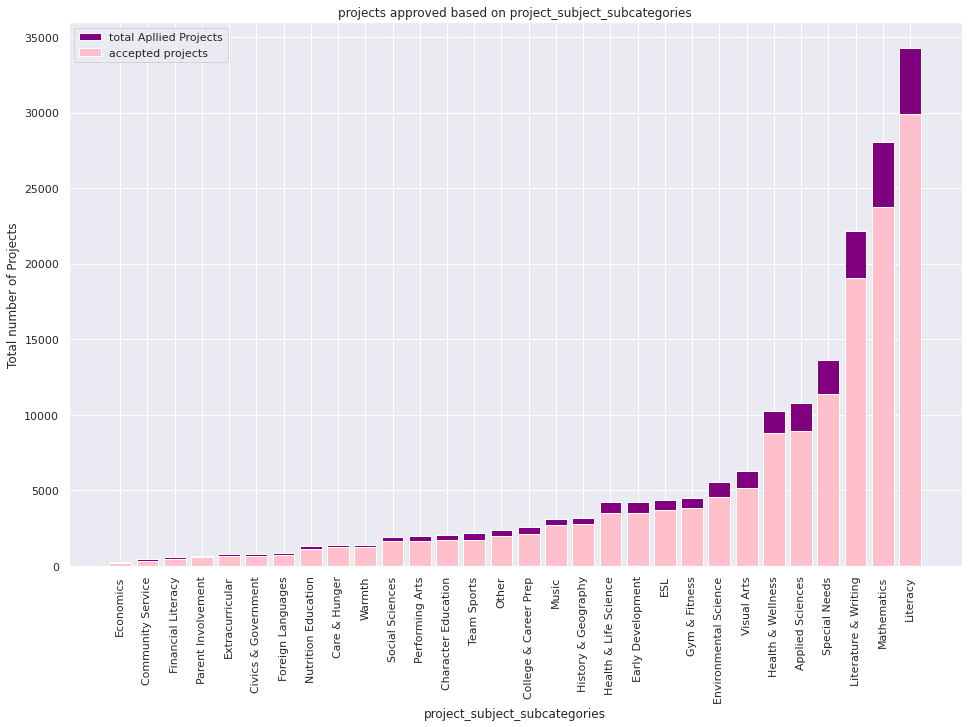

In [31]:
plot(names,val_all,val,"project_subject_subcategories","90")

#project_title

In [32]:
#https://stackoverflow.com/a/37483537/4084039
words=project['project_title'].str.split().apply(len).value_counts(ascending=True).index.tolist()
total=project['project_title'].str.split().apply(len).value_counts(ascending=True).values
count=project['project_title'][project.project_is_approved==1].str.split().apply(len).value_counts(ascending=True).values


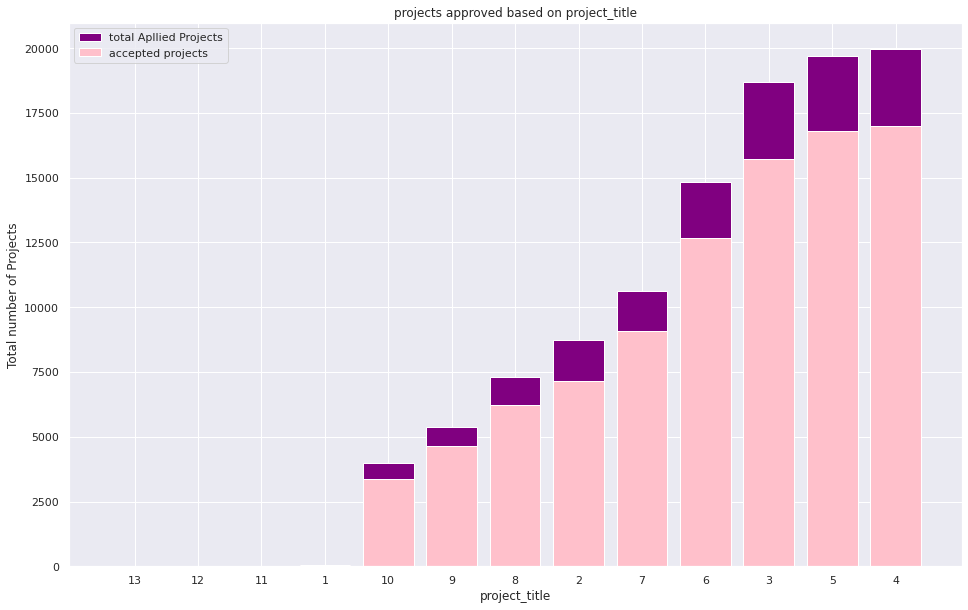

array([    1,    11,    30,    31,  3968,  5383,  7289,  8733, 10631,
       14824, 18691, 19677, 19979])

In [33]:
plot(words,total,count,"project_title")
total

In [34]:
approved=project['project_title'][project.project_is_approved==1].str.split().apply(len).values
rejected=project['project_title'][project.project_is_approved==0].str.split().apply(len).values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


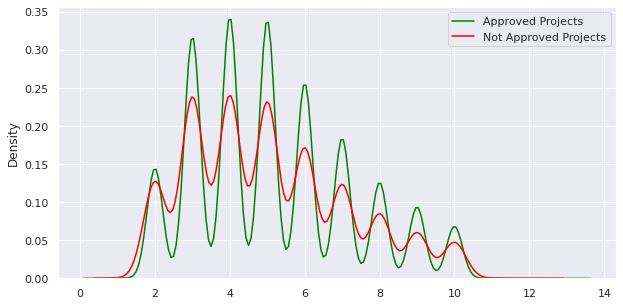

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(approved, hist=False, label="Approved Projects",color='green')
sns.distplot(rejected, hist=False, label="Not Approved Projects",color="red")
plt.legend()
plt.show()

#Price

In [36]:
#resource.sample(2)
#resource.shape
#resource.shape[0]-project.shape[0]

In [37]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
R=resource.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()
R.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [38]:
project=pd.merge(project,R,on='id',how='left')

In [39]:
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1


In [40]:
approved=project["price"][project.project_is_approved==1].values
rejected=project["price"][project.project_is_approved==0].values

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

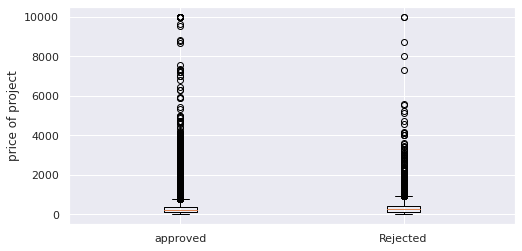

In [41]:
plt.figure(figsize=(8,4))
sns.set_theme()
plt.boxplot([approved,rejected])
plt.xticks([1,2],["approved","Rejected"])
plt.ylabel("price of project")
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


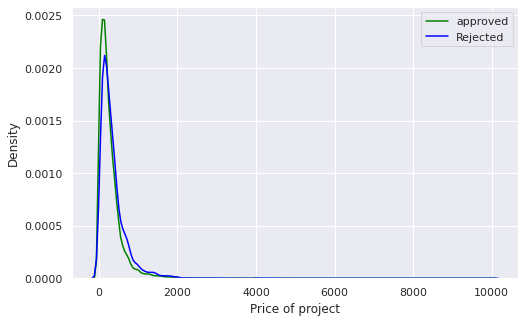

In [42]:
#sns.set_theme()
plt.figure(figsize=(8,5))
sns.distplot(approved,hist=False,color='green')
sns.distplot(rejected,hist=False,color='blue')
plt.xlabel("Price of project")
plt.legend(['approved','Rejected'])
plt.show()

In [43]:
#percentiles
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=['Percentile','Approved project price','Rejected project price']
for i in range(0,100+1,10):
  A=str(round(np.percentile(approved,i),2))+" $"
  R=str(round(np.percentile(rejected,i),2))+" $"
  i=str(i)+" th"
  table.add_row([i,A,R])


In [44]:
print(table)

+------------+------------------------+------------------------+
| Percentile | Approved project price | Rejected project price |
+------------+------------------------+------------------------+
|    0 th    |         0.66 $         |         1.97 $         |
|   10 th    |        33.88 $         |        73.67 $         |
|   20 th    |        77.38 $         |        118.56 $        |
|   30 th    |        116.68 $        |        162.23 $        |
|   40 th    |        157.0 $         |        208.63 $        |
|   50 th    |        198.99 $        |        263.14 $        |
|   60 th    |        255.63 $        |        325.14 $        |
|   70 th    |        321.22 $        |        399.99 $        |
|   80 th    |        411.67 $        |        519.28 $        |
|   90 th    |        593.11 $        |        739.36 $        |
|   100 th   |        9999.0 $        |        9999.0 $        |
+------------+------------------------+------------------------+


**Quantity**

In [45]:
approved=project["quantity"][project.project_is_approved==1].values
rejected=project["quantity"][project.project_is_approved==0].values

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

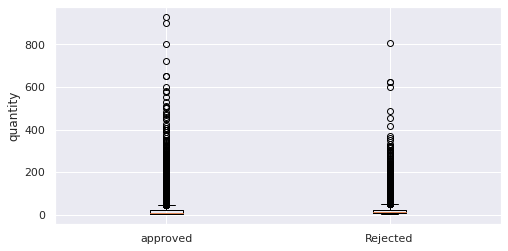

In [46]:
plt.figure(figsize=(8,4))
sns.set_theme()
plt.boxplot([approved,rejected])
plt.xticks([1,2],["approved","Rejected"])
plt.ylabel("quantity")
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


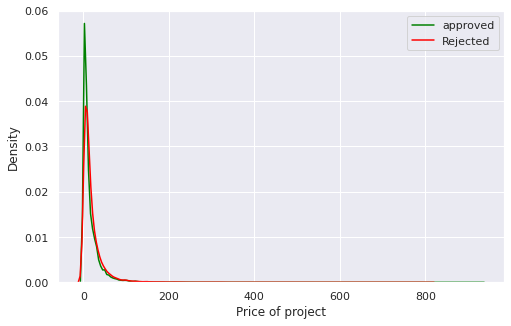

In [47]:
#sns.set_theme()
plt.figure(figsize=(8,5))
sns.distplot(approved,hist=False,color='green')
sns.distplot(rejected,hist=False,color='red')
plt.xlabel("Price of project")
plt.legend(['approved','Rejected'])
plt.show()

**teacher_number_of_previously_posted_projects**

In [48]:
approved=project["teacher_number_of_previously_posted_projects"][project.project_is_approved==1].values
rejected=project["teacher_number_of_previously_posted_projects"][project.project_is_approved==0].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


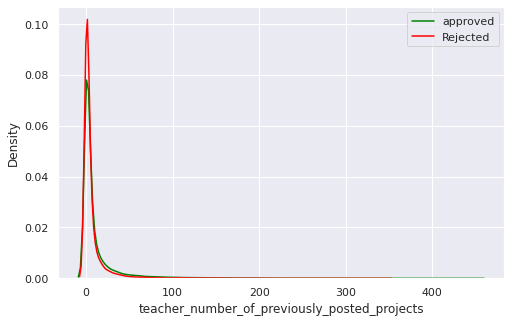

In [49]:
plt.figure(figsize=(8,5))
sns.distplot(approved,hist=False,color='green')
sns.distplot(rejected,hist=False,color='red')
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.legend(['approved','Rejected'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

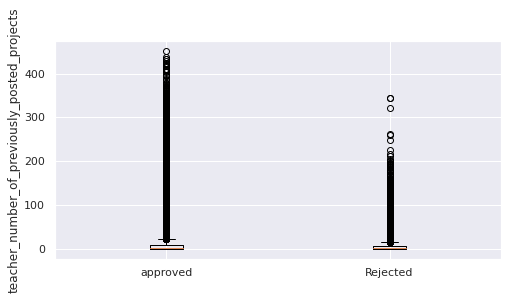

In [50]:
plt.figure(figsize=(8,4))
sns.set_theme()
plt.boxplot([approved,rejected])
plt.xticks([1,2],["approved","Rejected"])
plt.ylabel("teacher_number_of_previously_posted_projects")
plt.plot()

**project_submitted_datetime**

In [51]:
def year(date):
  yr = re.findall(r'^.{0,4}',date)
  #print(yr[0])
  return yr[0]

In [52]:
temp=project["project_submitted_datetime"].apply(year)
project['year']=temp.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


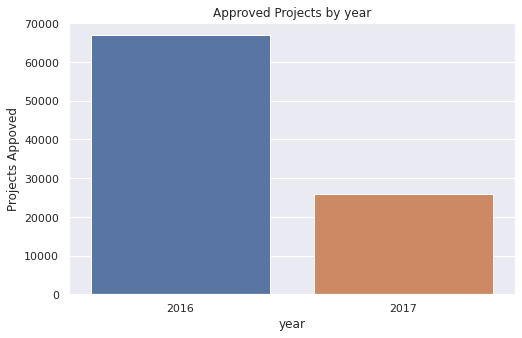

In [53]:
bar('year')

{'2016': 66832, '2017': 25874}


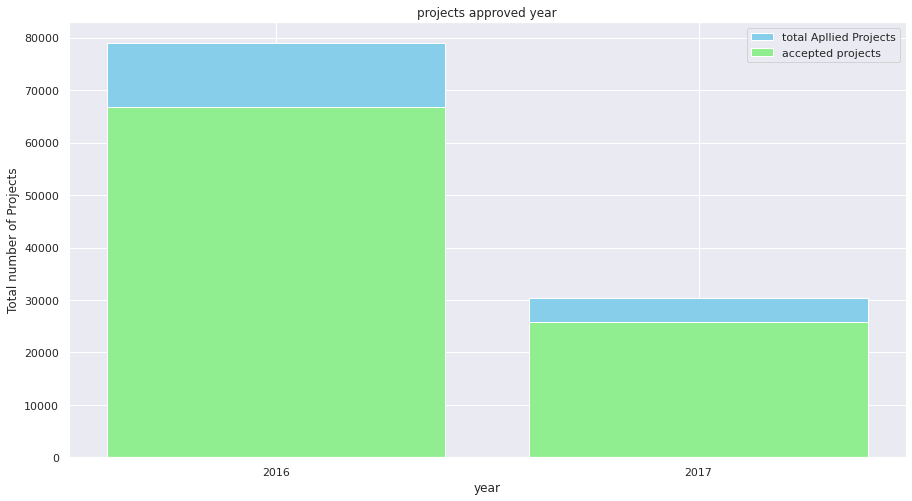

In [54]:
df=get_frame('year')
stack_bar('year',df)

#**Pre-Processing**

In [55]:
project.shape

(109248, 20)

In [56]:
project.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
price                                                0
quantity  

**1. project_grade_category**

In [57]:
project["project_grade_category"].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [58]:
project["project_grade_category"]=project["project_grade_category"].str.replace(' ','_').str.replace('-','_').str.lower()

In [59]:
project["project_grade_category"].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

**2. project_subject_categories**

In [60]:
project['project_subject_categories'].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

In [61]:
project["project_subject_categories"]=project["project_subject_categories"].str.replace(" & ","_").str.replace(" ","").str.replace(',',' ').str.lower()

In [62]:
project["project_subject_categories"].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language math_science          14636
health_sports                           10177
music_thearts                            5180
specialneeds                             4226
literacy_language specialneeds           3961
appliedlearning                          3771
math_science literacy_language           2289
appliedlearning literacy_language        2191
history_civics                           1851
math_science specialneeds                1840
literacy_language music_thearts          1757
math_science music_thearts               1642
appliedlearning specialneeds             1467
history_civics literacy_language         1421
health_sports specialneeds               1391
warmth care_hunger                       1309
math_science appliedlearning             1220
appliedlearning math_science             1052
literacy_language history_civics          809
health_sports literacy_language   

**'teacher_prefix'**

In [63]:
project["teacher_prefix"].isnull().sum()

3

In [64]:
project["teacher_prefix"].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [65]:
#Replacing null values with 'MRS'
project['teacher_prefix'].fillna('Mrs',inplace=True)


In [66]:
project["teacher_prefix"].isnull().sum()

0

In [67]:
project["teacher_prefix"].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Mrs            3
Name: teacher_prefix, dtype: int64

In [68]:
project["teacher_prefix"]=project["teacher_prefix"].str.replace('.',"").str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [69]:
project["teacher_prefix"].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

**project_subject_subcategories**

In [70]:
project['project_subject_subcategories'].value_counts()

Literacy                             9486
Literacy, Mathematics                8325
Literature & Writing, Mathematics    5923
Literacy, Literature & Writing       5571
Mathematics                          5379
                                     ... 
Community Service, Gym & Fitness        1
Parent Involvement, Team Sports         1
Gym & Fitness, Social Sciences          1
Community Service, Music                1
Economics, Foreign Languages            1
Name: project_subject_subcategories, Length: 401, dtype: int64

In [71]:
project['project_subject_subcategories']=project['project_subject_subcategories'].str.replace(' & ','_').str.replace(' ','').str.replace(',',' ').str.lower()

In [72]:
project['project_subject_subcategories'].value_counts()

literacy                          9486
literacy mathematics              8325
literature_writing mathematics    5923
literacy literature_writing       5571
mathematics                       5379
                                  ... 
communityservice gym_fitness         1
parentinvolvement teamsports         1
gym_fitness socialsciences           1
communityservice music               1
economics foreignlanguages           1
Name: project_subject_subcategories, Length: 401, dtype: int64

**school_state**

In [73]:
project['school_state'].isnull().sum()

0

In [74]:
project['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

In [75]:
project['school_state']=project['school_state'].str.lower()

In [76]:
project['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

**year**

In [77]:
project.drop(["project_submitted_datetime"],axis=1,inplace=True)

**project_title**

In [78]:
project['project_title'].isnull().sum()

0

In [79]:
project['project_title'].sample(5)

2345                 StEM Class needs new T for reading!
26071     Focus on Learning Through Alternative Seating!
100819                            Getting Comfy With It!
49539                   Games and Dramatic Play Supplies
2722                                  D.I.Y Math Centers
Name: project_title, dtype: object

In [80]:
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [81]:
def preprocessed(corpus):
  preprocessed_text=[]
  for sen in corpus:
    doc=decontracted(sen)
    doc=doc.replace('\\r', ' ').replace('\\n',' ').replace('\\"',' ')
    doc=re.sub(r'[^A-Za-z0-9]+',' ',doc)
    doc=doc.lower().strip()
    preprocessed_text.append(doc)
  return preprocessed_text

In [82]:
# preprocessed project_title
x=preprocessed(project['project_title'].values)
project['project_title']=x

**essay**

In [83]:
print("Null values in '{}' {}".format('project_essay_1',project['project_essay_1'].isnull().sum()))
print("Null values in '{}' {}".format('project_essay_2',project['project_essay_2'].isnull().sum()))
print("Null values in '{}' {}".format('project_essay_3',project['project_essay_3'].isnull().sum()))
print("Null values in '{}' {}".format('project_essay_4',project['project_essay_4'].isnull().sum()))

Null values in 'project_essay_1' 0
Null values in 'project_essay_2' 0
Null values in 'project_essay_3' 105490
Null values in 'project_essay_4' 105490


In [84]:
print("almost {}% points in project_essay_3 are null".format(round(project['project_essay_3'].isnull().sum()/project.shape[0]*(100))))
print("almost {}% points in project_essay_3 are null".format(round(project['project_essay_4'].isnull().sum()/project.shape[0]*(100))))

almost 97% points in project_essay_3 are null
almost 97% points in project_essay_3 are null


In [85]:
project['essay']=project['project_essay_1'].values+" "+project['project_essay_2'].values

In [86]:
# preprocessing essay
project['essay']=preprocessed(project['essay'].values)

In [87]:
# dropping 
project.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'],inplace=True,axis=1)

In [88]:
project.sample(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,year,essay
72764,50407,p110079,1a88f3d93c92c121747424e5900733eb,ms,ca,grades_prek_2,math_science,mathematics,future engineers one tile at a time,My students need Magna Tiles to help them expl...,0,1,147.58,2,2016,my students are fun energetic and filled with ...
100641,18035,p079556,fc90448e7ad56741c29c1466f30e786e,ms,ca,grades_3_5,specialneeds,specialneeds,fourth grade wiggle worms need special seats,My students need hokki stools to help them get...,1,1,214.12,2,2016,i am a first year teacher working in a high ne...


**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Filtering features and dumping into a pickle file to our google drive**

In [89]:
# filtering features for our dataset
df=project[['teacher_prefix','school_state','project_grade_category','project_subject_categories',
       'project_subject_subcategories','project_title','essay','year','price','teacher_number_of_previously_posted_projects','quantity','project_is_approved']]

In [90]:
df.shape

(109248, 12)

In [91]:
df.sample(2)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,essay,year,price,teacher_number_of_previously_posted_projects,quantity,project_is_approved
40652,ms,az,grades_prek_2,literacy_language,literacy,comfy reading corner for friendly kids and books,i have a wonderful group of students however o...,2016,1210.47,0,12,0
7380,mrs,pa,grades_3_5,literacy_language math_science,literacy mathematics,help our scholars use their energy,pittsburgh weil is an urban public school in p...,2016,54.11,1,30,1


In [92]:
#checking and droppind duplicate rows
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

10


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [101]:
# dumping preprocessed dataset to google drive named as "TRAIN"
df.to_pickle('/content/drive/MyDrive/Colab Notebooks/TRAIN_data.csv')